Akash Sahadevan, Louise Filkorn, Shreyansh Misra

# Milestone 2

## 1. Project Definition

Our project aims to explore how daily screen time influences aspects of personal health, well-being, and productivity, focusing on physical activity (step count), mood, focus, and mental fatigue. In a world increasingly influenced by our smartphones and devices, understanding these correlations can help identify healthier digital habits and inform strategies for better time management and well-being.

This project interests our team because we each experience different levels of device usage for work, study, and leisure, yet notice distinct effects on our energy, motivation, and mental clarity. By collecting and analyzing data over six weeks, we aim to uncover patterns showing how our screen time behaviors correlate with both objective measures (like step count) and subjective measures (like mood, productivity, and fatigue).

## 2. Cursory Analysis

In [1]:
import pandas as pd
df = pd.read_csv('screentime.csv')
df.columns = df.columns.str.strip()
print(df.columns)

Index(['date', 'screentime_phone', 'screentime_laptop', 'stepcount',
       'sleepduration', 'mood_am', 'mood_pm', 'mentalfatigue_am',
       'mentalfatigue_pm', 'productivity', 'name'],
      dtype='object')


Our dataset includes Date, Screen Time (Phone), Screen Time (Laptop), Step Count, Sleep Duration, Mood (AM), Mood (PM), Mental Fatigue (AM), Mental Fatigue (PM), and Productivity. We were able to track screen time and step count automatically using Apple Health, while subjective measures like mood, mental fatigue, and productivity were manually recorded and entered into a shared spreadsheet. We combined all of these into a single dataset in Google Sheets, exported the data as a CSV file, and imported it into Jupyter Notebooks as a pandas dataframe.

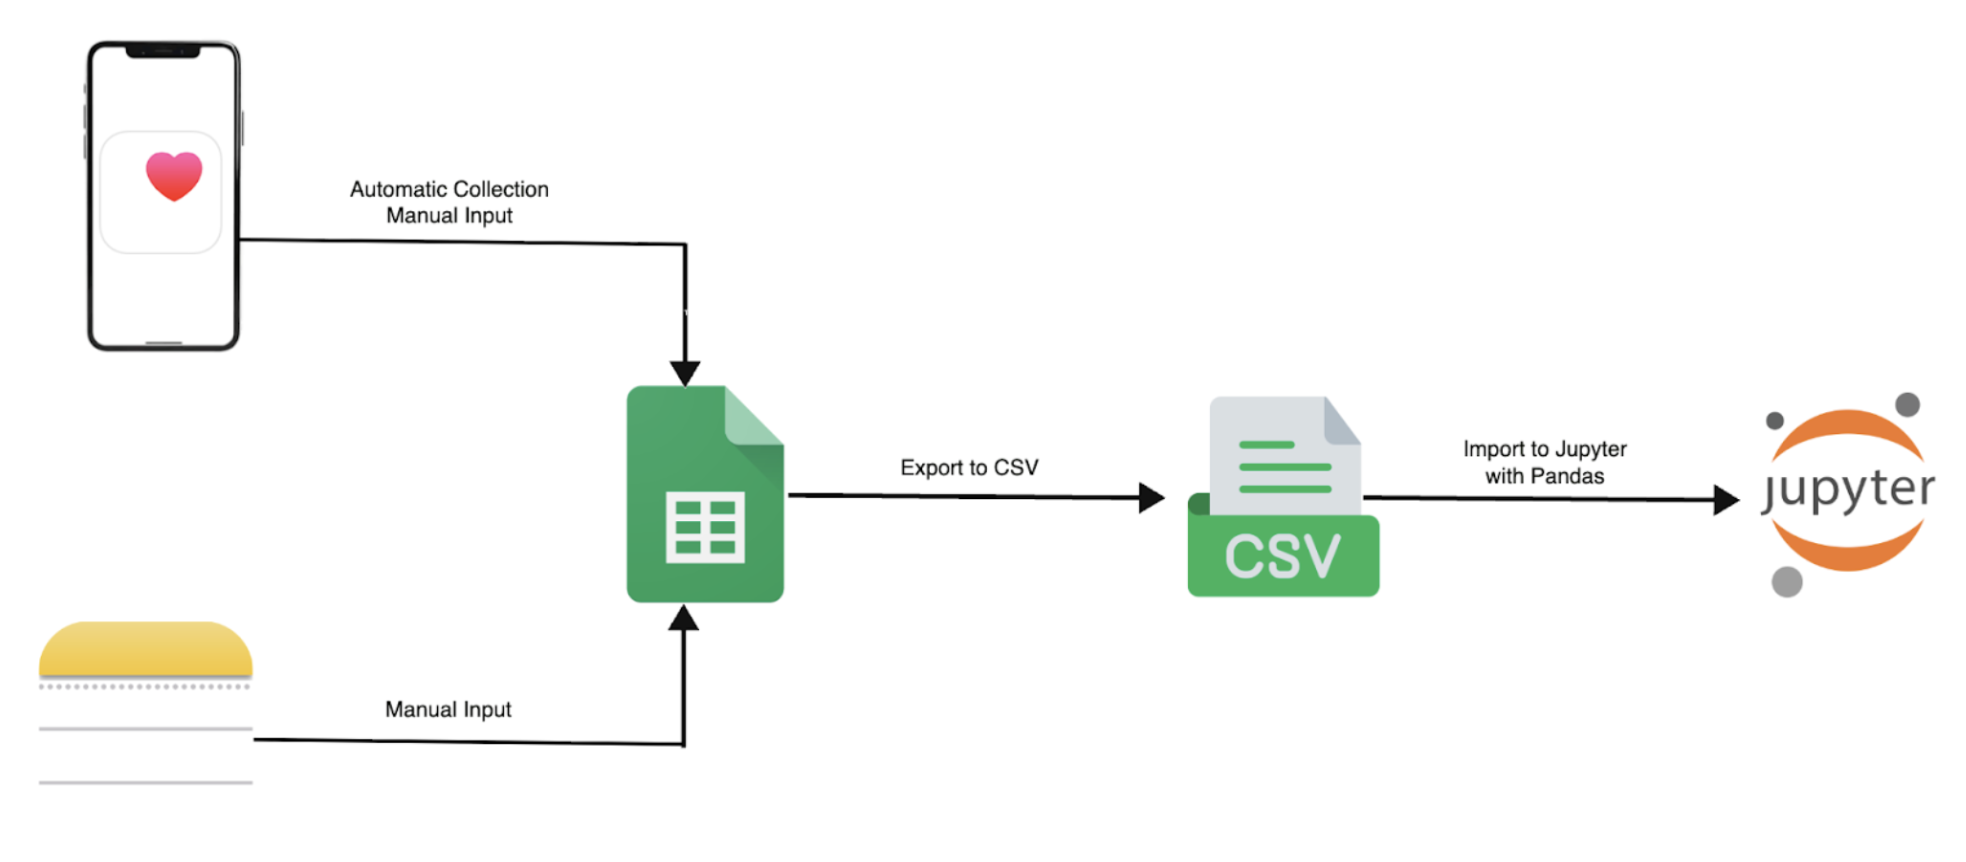

In [2]:
from IPython.display import Image
Image("img/pipeline.png")

We initially tried to extract our data from Apple Health but the extraction process was lengthier than expected so we manually input the data from our phones into the spreadsheet. While doing this, however, we noticed that some of the automatically counted data like steps were inaccurate. 

In [3]:
print(df.shape)
df

(35, 11)


,date,screentime_phone,screentime_laptop,stepcount,sleepduration,mood_am,mood_pm,mentalfatigue_am,mentalfatigue_pm,productivity,name
0,10/13/2025,204,231,9103,7,3,4,3,4,5,shrey
1,10/14/2025,262,164,5941,8,5,4,4,3,4,shrey
2,10/15/2025,355,301,10476,8,3,5,4,3,3,shrey
3,10/16/2025,237,190,5723,9,5,4,3,3,4,shrey
4,10/17/2025,191,355,12374,6,3,3,4,3,3,shrey
5,10/18/2025,254,19,13548,10,5,4,3,4,1,shrey
6,10/19/2025,233,201,6991,9,3,5,3,4,4,shrey
7,10/20/2025,392,274,9286,6,2,4,4,2,4,shrey
8,10/21/2025,215,154,10395,7,5,4,5,3,2,shrey
9,10/22/2025,433,213,13166,9,5,4,4,4,3,shrey


In [4]:
first_row_list = df.iloc[0].tolist()
first_row_list

['10/13/2025', 204, 231, '9103', 7, 3, 4, 3, 4, 5, 'shrey']

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['stepcount'] = pd.to_numeric(df['stepcount'], errors='coerce')

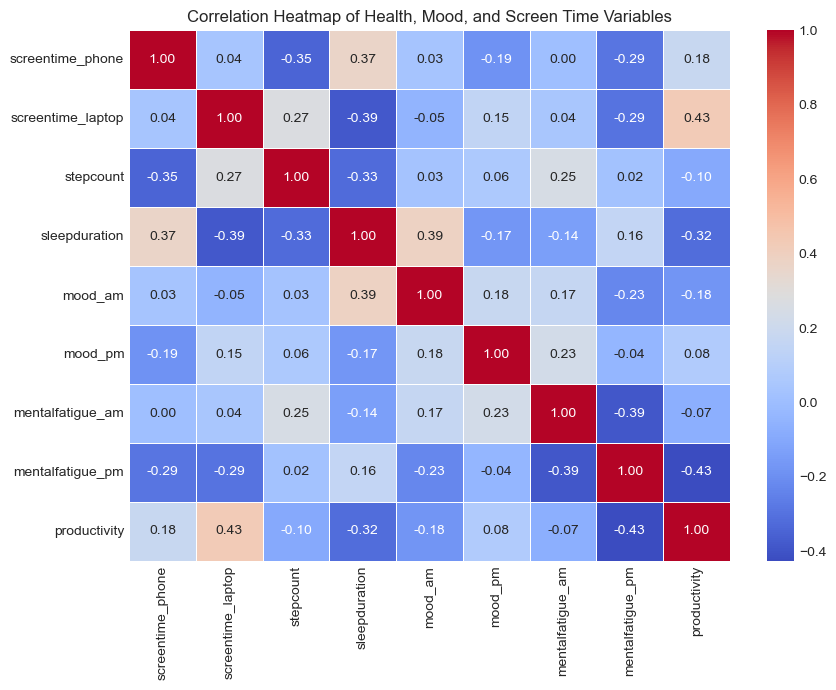

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("coolwarm")

numeric_cols = ['screentime_phone', 'screentime_laptop', 'stepcount',
                'sleepduration', 'mood_am', 'mood_pm',
                'mentalfatigue_am', 'mentalfatigue_pm', 'productivity']
corr = df[numeric_cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Health, Mood, and Screen Time Variables")
plt.tight_layout()
plt.show()

<Figure size 600x500 with 0 Axes>

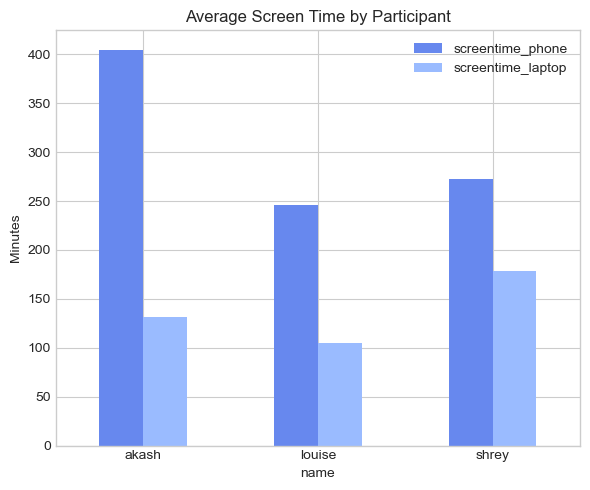

In [7]:
if 'name' in df.columns:
    plt.figure(figsize=(6, 5))
    avg_screen = df.groupby('name')[['screentime_phone', 'screentime_laptop']].mean().reset_index()
    avg_screen.plot(x='name', kind='bar', figsize=(6, 5))
    plt.title("Average Screen Time by Participant")
    plt.ylabel("Minutes")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()